In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [34]:
import sys
import os

# Add the utils folder to the path
sys.path.append(os.path.abspath("utils"))


In [23]:
data_dir = "dataset"
categories = os.listdir(data_dir)
print("Classes found:", categories)


Classes found: ['leapGestRecog']


In [24]:
import os
print("📌 Current Working Directory:", os.getcwd())


📌 Current Working Directory: C:\Users\HP\OneDrive\Desktop\hand-gesture-recognition


In [25]:
print("Trying to load:", img_path)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)


Trying to load: dataset/leapGestRecog\01\10_down\frame_01_10_0094.png


In [26]:
import os
import cv2
import numpy as np
from tqdm import tqdm

IMG_SIZE = 64
X = []
y = []

data_dir = 'dataset/leapGestRecog'
categories = [str(i).zfill(2) for i in range(10)]  # '00', '01', ...

for idx, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    gestures = os.listdir(folder_path)

    for gesture in gestures:
        gesture_path = os.path.join(folder_path, gesture)
        if not os.path.isdir(gesture_path):
            continue
        
        images = os.listdir(gesture_path)[:5]  # LIMIT TO FIRST 5 IMAGES

        for img_name in images:
            img_path = os.path.join(gesture_path, img_name)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(idx)
            except Exception as e:
                print(f"Error loading image: {img_path}")

X = np.array(X)
y = np.array(y)

print("Done loading small dataset 🚀")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


Done loading small dataset 🚀
X shape: (500, 64, 64)
y shape: (500,)


In [27]:
# Normalize pixel values (0–255) → (0–1)
X = X / 255.0

# Reshape X for model input (SVM needs 2D: samples x features)
X = X.reshape(X.shape[0], -1)

print("Normalized and reshaped X:")
print("X shape:", X.shape)


Normalized and reshaped X:
X shape: (500, 4096)


In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Normalize pixel values (0-255) to 0-1
X = X / 255.0

# Flatten images for SVM (reshape from 64x64 to 4096)
X = X.reshape(len(X), -1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data ready for model training ✅")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Data ready for model training ✅
Training set: (400, 4096), Test set: (100, 4096)


In [29]:
from sklearn.svm import SVC
import joblib

# Train SVM model
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)

# Save the model
import os
os.makedirs("model", exist_ok=True)  # make sure the model folder exists
joblib.dump(clf, "model/svm_model.pkl")
print("✅ Model trained and saved as model/svm_model.pkl")


✅ Model trained and saved as model/svm_model.pkl


✅ Test Accuracy: 0.04

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         9
           4       0.04      1.00      0.08         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        15

    accuracy                           0.04       100
   macro avg       0.00      0.10      0.01       100
weighted avg       0.00      0.04      0.00       100



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


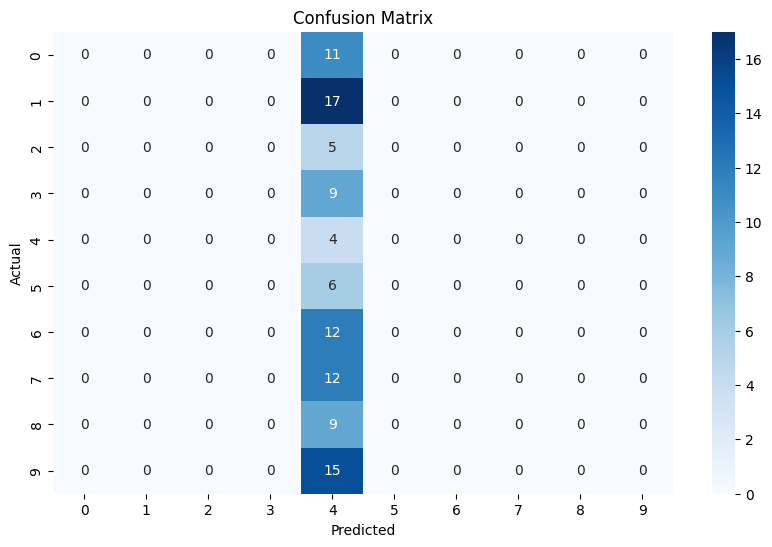

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("✅ Test Accuracy:", acc)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [31]:
import joblib
import os

# Create model folder if it doesn't exist
os.makedirs("model", exist_ok=True)

# Save the trained model
joblib.dump(clf, "model/svm_model.pkl")
print("✅ Model saved to 'model/svm_model.pkl'")


✅ Model saved to 'model/svm_model.pkl'


In [32]:
def predict_image(img_path, model, img_size=64):
    import cv2
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = img.reshape(1, -1) / 255.0
    prediction = model.predict(img)[0]
    return prediction

# Test a sample image
sample_path = 'dataset/leapGestRecog/01/01_palm/frame_01_01_0001.png'
print("Predicted gesture class:", predict_image(sample_path, clf))


Predicted gesture class: 4


In [41]:
import sys
import os

sys.path.append(os.path.abspath("utils"))
from data_utils import load_dataset

X, y = load_dataset("dataset/leapGestRecog", img_size=64, max_per_class=50)
print("✅ Loaded from utils!")
print("X shape:", X.shape)
print("y shape:", y.shape)


❌ Error loading image: dataset/leapGestRecog\00\01_palm
❌ Error loading image: dataset/leapGestRecog\00\02_l
❌ Error loading image: dataset/leapGestRecog\00\03_fist
❌ Error loading image: dataset/leapGestRecog\00\04_fist_moved
❌ Error loading image: dataset/leapGestRecog\00\05_thumb
❌ Error loading image: dataset/leapGestRecog\00\06_index
❌ Error loading image: dataset/leapGestRecog\00\07_ok
❌ Error loading image: dataset/leapGestRecog\00\08_palm_moved
❌ Error loading image: dataset/leapGestRecog\00\09_c
❌ Error loading image: dataset/leapGestRecog\00\10_down
❌ Error loading image: dataset/leapGestRecog\01\01_palm
❌ Error loading image: dataset/leapGestRecog\01\02_l
❌ Error loading image: dataset/leapGestRecog\01\03_fist
❌ Error loading image: dataset/leapGestRecog\01\04_fist_moved
❌ Error loading image: dataset/leapGestRecog\01\05_thumb
❌ Error loading image: dataset/leapGestRecog\01\06_index
❌ Error loading image: dataset/leapGestRecog\01\07_ok
❌ Error loading image: dataset/leapGest

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [40]:
import sys
import os
sys.path.append(os.path.abspath("utils"))

from data_utils import load_dataset  # Now this should work!
